beamforming weights:  (1+0j) (-1-1.2246467991473532e-16j) (1+2.4492935982947064e-16j) (-1-3.6739403974420594e-16j)


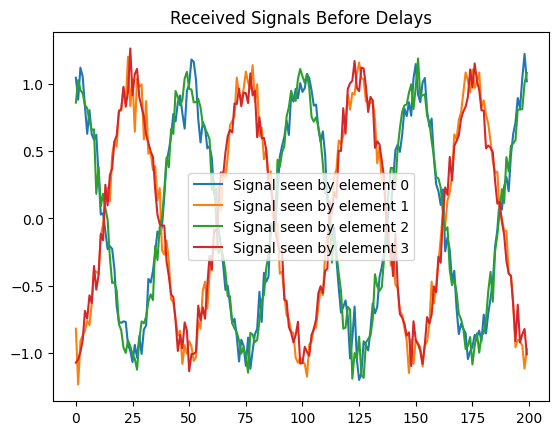

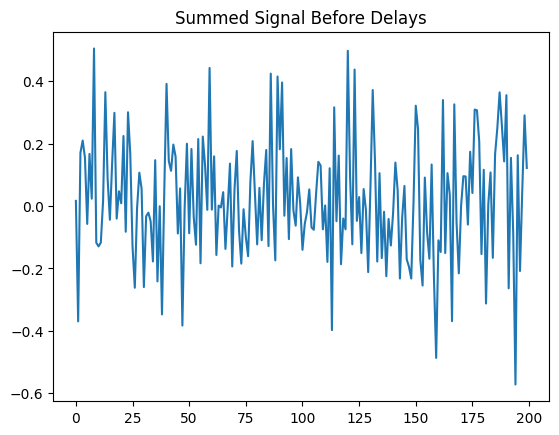

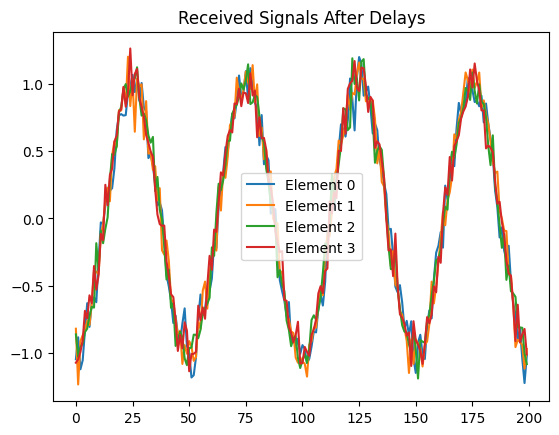

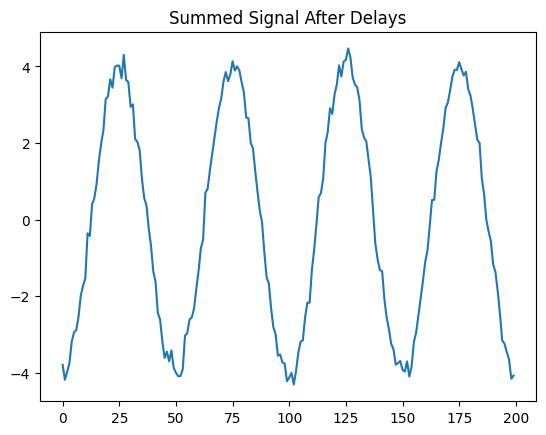

Average Error:  6.844432943340366 %


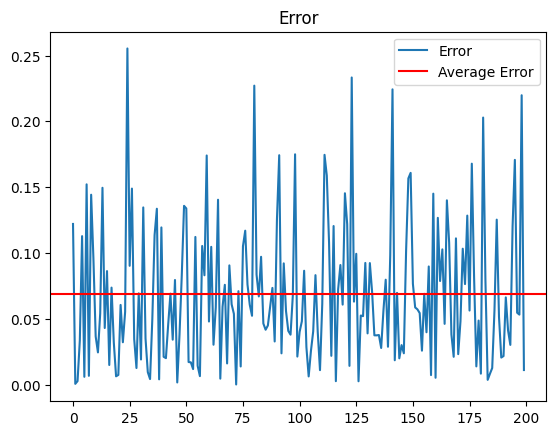

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

sample_rate = 1e6
N = 10000 # number of samples to simulate
d = 0.5 # half wavelength spacing
Nr = 4 # number of elements
theta_degrees = 90 # angle of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians

# Create 4 tones to simulate signals being seen by each element
t = np.arange(N)/sample_rate # time vector
f_tone = 0.02e6 # carrier frequency
signal = np.exp(2j * np.pi * f_tone * t)

# Calculate beamforming weights using angle of arrival theta and element spacing
b_0 = np.exp(-2j * np.pi * d * 0 * np.sin(theta)) # array factor
b_1 = np.exp(-2j * np.pi * d * 1 * np.sin(theta)) # array factor
b_2 = np.exp(-2j * np.pi * d * 2 * np.sin(theta)) # array factor
b_3 = np.exp(-2j * np.pi * d * 3 * np.sin(theta)) # array factor

print("beamforming weights: ", b_0, b_1, b_2, b_3)

# Simulate delay between the 4 received signals
tx = []
tx.append(signal * b_0)
tx.append(signal * b_1)
tx.append(signal* b_2)
tx.append(signal * b_3)

# Introduce noise
n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
tx = tx + 0.1*n # r and n are both 3x10000

# Plot signals seen by each individual element
plt.plot(np.asarray(tx[0]).squeeze().real[0:200], label="Signal seen by element 0")
plt.plot(np.asarray(tx[1]).squeeze().real[0:200], label="Signal seen by element 1")
plt.plot(np.asarray(tx[2]).squeeze().real[0:200], label="Signal seen by element 2")
plt.plot(np.asarray(tx[3]).squeeze().real[0:200], label="Signal seen by element 3")
plt.title("Received Signals Before Delays")
plt.legend()
plt.show()

# Multiply received signal data by beamforming weights
rx = []
rx.append(b_3*tx[0])
rx.append(b_2*tx[1])
rx.append(b_1*tx[2])
rx.append(b_0*tx[3])

# Plot summation of signals before beamforming weights applied
summed_signal = np.asarray(tx[0]).squeeze().real[0:200] + np.asarray(tx[1]).squeeze().real[0:200] + np.asarray(tx[2]).squeeze().real[0:200] + np.asarray(tx[3]).squeeze().real[0:200]
plt.plot(summed_signal, label="Summed")
plt.title("Summed Signal Before Delays")
plt.show()

# Plot signal data after beamforming weights applied
plt.plot(np.asarray(rx[0]).squeeze().real[0:200], label="Element 0")
plt.plot(np.asarray(rx[1]).squeeze().real[0:200], label="Element 1")
plt.plot(np.asarray(rx[2]).squeeze().real[0:200], label="Element 2")
plt.plot(np.asarray(rx[3]).squeeze().real[0:200], label="Element 3")
plt.title("Received Signals After Delays")
plt.legend()
plt.show()

# Plot summed signal after beamforming weights
summed_signal = np.asarray(rx[0]).squeeze().real[0:200] + np.asarray(rx[1]).squeeze().real[0:200] + np.asarray(rx[2]).squeeze().real[0:200] + np.asarray(rx[3]).squeeze().real[0:200]
plt.plot(summed_signal, label="Summed")
plt.title("Summed Signal After Delays")
plt.show()

# Plot error between received and original signal
plt.plot(abs((summed_signal/4) - np.asarray(tx[3]).squeeze().real[0:200]), label="Error")
average_error = sum( abs((summed_signal/4) - np.asarray(tx[3]).squeeze().real[0:200]) ) /200
plt.axhline(average_error, color='r', label="Average Error")
print("Average Error: ", 100*average_error, "%")
plt.legend()
plt.title("Error")
plt.show()



EVERYTHING BELOW THIS CELL IS EXPERIMENTAL!!! DO NOT EXPECT FUNCTIONALITY.

In [8]:
# # Create a tone to simulate a jammer
# f_jammer = 0.01e6
# tx_jammer= np.exp(2j * np.pi * f_jammer * t)

# plt.plot(np.asarray(tx_jammer).squeeze().real[0:200])
# plt.title("Jammer signal")
# plt.show()

# tx_combo = tx + tx_jammer
# plt.plot(np.asarray(tx_combo).squeeze().real[0:200])
# plt.title("Combined signal")
# plt.show()


d = 0.5 # half wavelength spacing
Nr = 4
theta_degrees = 30 # direction of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians
a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # array factor
print("a: ", a) # note that it's a 1xNr, it's complex, and the first element is 1+0j

a = np.asmatrix(a)
tx = np.asmatrix(tx)


r = a.T @ tx  # don't get too caught up by the transpose a, the important thing is we're multiplying the array factor by the tx signal
print("r.shape: ", r.shape) # r is now going to be a 2D array, 1D is time and 1D is the spatial dimension
print("r: ", r)

# Introduce noise
# n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
# r = r + 0.1*n # r and n are both 3x10000

# Plot each element's recieved signal separately
plt.plot(np.asarray(r[0,:]).squeeze().real[0:200], label="Element 1") # the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(r[1,:]).squeeze().real[0:200], label="Element 2")
plt.plot(np.asarray(r[2,:]).squeeze().real[0:200], label="Element 3")
plt.plot(np.asarray(r[3,:]).squeeze().real[0:200], label="Element 4")
plt.legend()
plt.title("Transmitter signal as seen by each element")
plt.show()

# Plot summed signal and original
summed_signal = np.asarray(r[0,:]).squeeze().real[0:200] + np.asarray(r[1,:]).squeeze().real[0:200] + np.asarray(r[2,:]).squeeze().real[0:200] + np.asarray(r[3,:]).squeeze().real[0:200]
plt.plot(np.asarray(tx).squeeze().real[0:200], label="Original")
plt.plot(summed_signal, label="Summed")
plt.title("Summed and Original Signals")
plt.legend()
plt.show()


# Plot error between received and original signal
plt.plot(abs((summed_signal/4) - np.asarray(tx).squeeze().real[0:200]))
plt.title("Error")
plt.show()


a:  [ 1.00000000e+00+0.0000000e+00j  2.83276945e-16-1.0000000e+00j
 -1.00000000e+00-5.6655389e-16j -1.07187544e-15+1.0000000e+00j]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

a:  [ 1.00000000e+00+0.0000000e+00j  2.83276945e-16-1.0000000e+00j
 -1.00000000e+00-5.6655389e-16j -1.07187544e-15+1.0000000e+00j]
r.shape:  (4, 10000)
r:  [[ 1.00000000e+00+0.00000000e+00j  9.92114701e-01+1.25333234e-01j
   9.68583161e-01+2.48689887e-01j ...  9.29776486e-01-3.68124553e-01j
   9.68583161e-01-2.48689887e-01j  9.92114701e-01-1.25333234e-01j]
 [ 2.83276945e-16-1.00000000e+00j  1.25333234e-01-9.92114701e-01j
   2.48689887e-01-9.68583161e-01j ... -3.68124553e-01-9.29776486e-01j
  -2.48689887e-01-9.68583161e-01j -1.25333234e-01-9.92114701e-01j]
 [-1.00000000e+00-5.66553890e-16j -9.92114701e-01-1.25333234e-01j
  -9.68583161e-01-2.48689887e-01j ... -9.29776486e-01+3.68124553e-01j
  -9.68583161e-01+2.48689887e-01j -9.92114701e-01+1.25333234e-01j]
 [-1.07187544e-15+1.00000000e+00j -1.25333234e-01+9.92114701e-01j
  -2.48689887e-01+9.68583161e-01j ...  3.68124553e-01+9.29776486e-01j
   2.48689887e-01+9.68583161e-01j  1.25333234e-01+9.92114701e-01j]]


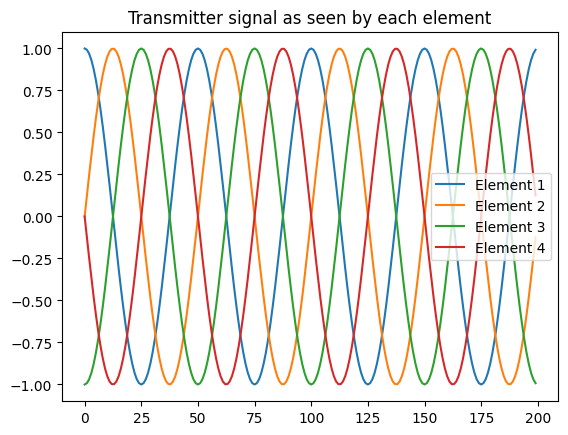

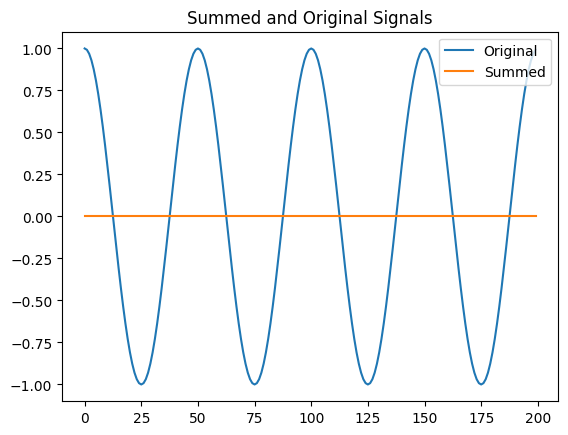

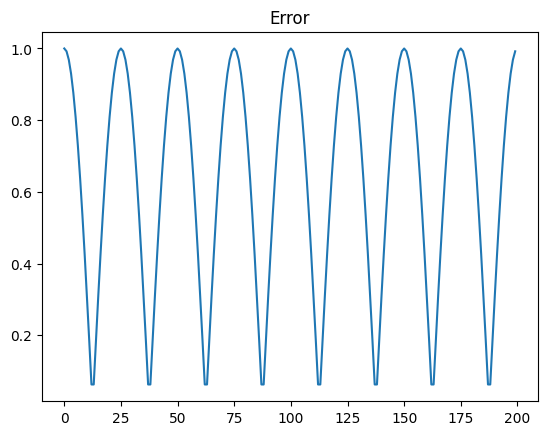

In [ ]:
# # Create a tone to simulate a jammer
# f_jammer = 0.01e6
# tx_jammer= np.exp(2j * np.pi * f_jammer * t)

# plt.plot(np.asarray(tx_jammer).squeeze().real[0:200])
# plt.title("Jammer signal")
# plt.show()

# tx_combo = tx + tx_jammer
# plt.plot(np.asarray(tx_combo).squeeze().real[0:200])
# plt.title("Combined signal")
# plt.show()


d = 0.5 # half wavelength spacing
Nr = 4
theta_degrees = 30 # direction of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians
a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # array factor
print("a: ", a) # note that it's a 1xNr, it's complex, and the first element is 1+0j

a = np.asmatrix(a)
tx = np.asmatrix(tx)


r = a.T @ tx  # don't get too caught up by the transpose a, the important thing is we're multiplying the array factor by the tx signal
print("r.shape: ", r.shape) # r is now going to be a 2D array, 1D is time and 1D is the spatial dimension
print("r: ", r)

# Introduce noise
# n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
# r = r + 0.1*n # r and n are both 3x10000

# Plot each element's recieved signal separately
plt.plot(np.asarray(r[0,:]).squeeze().real[0:200], label="Element 1") # the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(r[1,:]).squeeze().real[0:200], label="Element 2")
plt.plot(np.asarray(r[2,:]).squeeze().real[0:200], label="Element 3")
plt.plot(np.asarray(r[3,:]).squeeze().real[0:200], label="Element 4")
plt.legend()
plt.title("Transmitter signal as seen by each element")
plt.show()

# Plot summed signal and original
summed_signal = np.asarray(r[0,:]).squeeze().real[0:200] + np.asarray(r[1,:]).squeeze().real[0:200] + np.asarray(r[2,:]).squeeze().real[0:200] + np.asarray(r[3,:]).squeeze().real[0:200]
plt.plot(np.asarray(tx).squeeze().real[0:200], label="Original")
plt.plot(summed_signal, label="Summed")
plt.title("Summed and Original Signals")
plt.legend()
plt.show()


# Plot error between received and original signal
plt.plot(abs((summed_signal/4) - np.asarray(tx).squeeze().real[0:200]))
plt.title("Error")
plt.show()

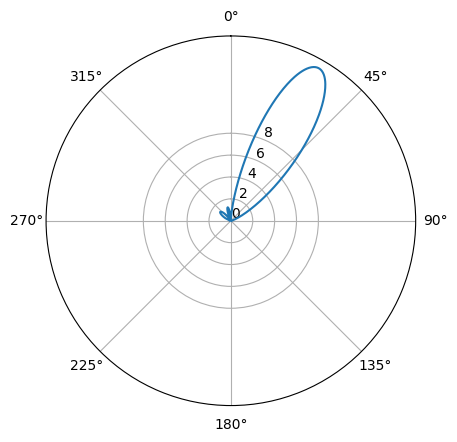

29.999999999999993


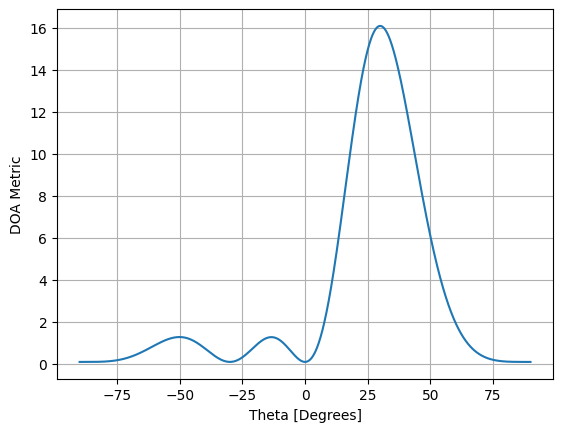

In [ ]:
# DOA

theta_scan = np.linspace(-1*np.pi/2, np.pi/2, 1000) # 1000 different thetas between -180 and +180 degrees



for doa in range(89,91):

    results = []

    theta = doa / 180 * np.pi # convert to radians
    a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # array factor
    # print(a) # note that it's a 1x3, it's complex, and the first element is 1+0j

    a = np.asmatrix(a)
    tx = np.asmatrix(tx)

    r = a.T @ tx  # don't get too caught up by the transpose a, the important thing is we're multiplying the array factor by the tx signal
    # print(r.shape) # r is now going to be a 2D array, 1D is time and 1D is the spatial dimension

    # Introduce noise
    n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
    r = r + 0.1*n # r and n are both 3x10000

    for theta_i in theta_scan:
        #print(theta_i)
        w = np.asmatrix(np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_i))) # look familiar?
        r_weighted = np.conj(w) @ r # apply our weights corresponding to the direction theta_i
        r_weighted = np.asarray(r_weighted).squeeze() # get it back to a normal 1d numpy array
        results.append(np.mean(np.abs(r_weighted)**2)) # energy detector
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta_scan, results) # MAKE SURE TO USE RADIAN FOR POLAR
    ax.set_theta_zero_location('N') # make 0 degrees point up
    ax.set_theta_direction(-1) # increase clockwise
    ax.set_rgrids([0,2,4,6,8])
    ax.set_rlabel_position(22.5)  # Move grid labels away from other labels
    plt.show()


# print angle that gave us the max value
print(theta_scan[np.argmax(results)] * 180 / np.pi) # 19.99999999999998
plt.plot(theta_scan*180/np.pi, results) # lets plot angle in degrees
plt.xlabel("Theta [Degrees]")
plt.ylabel("DOA Metric")
plt.grid()
plt.show()

